In [42]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from plot_config import line_colors, lr_line_style, zs_line_style, ccs_line_style

num_hidden_layers = 40
layers_arr = np.arange(num_hidden_layers)

In [2]:
def load_data(data, train_dataset, test_dataset, reporter: str, path: str):
    data[(train_dataset, test_dataset, reporter)] = pd.read_csv(path)

In [35]:
d_array_all = [1,5,10,50,100,250,500,750,1000]

In [47]:
data = {}

for d in d_array_all:
    dataset = f"arith{d}" 
    vinc_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to{d}/vinc/eval.csv'
    load_data(data, dataset, dataset, 'vinc', vinc_path)

for d in [1,10,100,250,500,750]:
    origin_dataset = "arith1000"
    dataset = f"arith{d}" 
    vinc_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to1000/vinc/transfer_eval/sethapun/arithmetic_2as_1to{d}/eval.csv'
    load_data(data, origin_dataset, dataset, 'vinc', vinc_path_transfer)

for d in [1,5,10,100,500,1000]:
    dataset = f"arith{d}" 
    ccs_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to{d}/ccs/eval.csv'
    load_data(data, dataset, dataset, 'ccs', ccs_path)

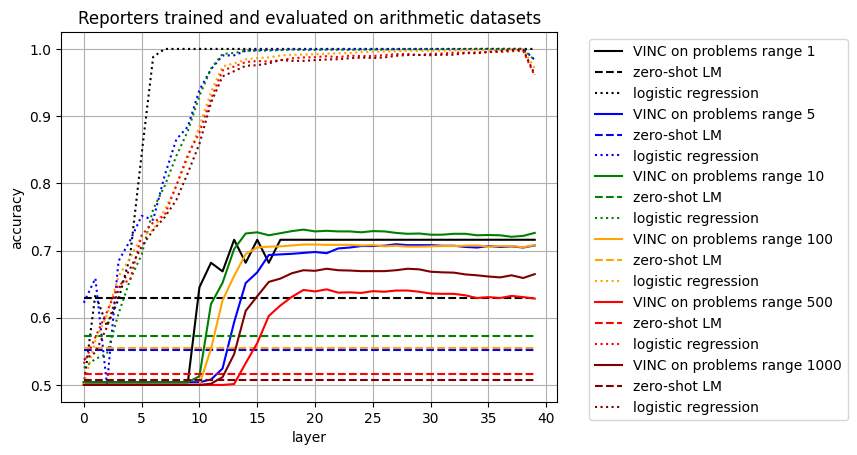

In [48]:
#big headline result

fig, ax = plt.subplots()
ax.set_title(fr"Reporters trained and evaluated on arithmetic datasets")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,5,10,100,500,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
    # experiment = data2[(dataset, dataset, 'ccs')]
    # layers = experiment['layer']
    # acc = experiment['acc']
    # ax.plot(layers, acc, label=f'CCS on problems range 1 to {d}', color=line_color, linestyle=ccs_line_style)
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

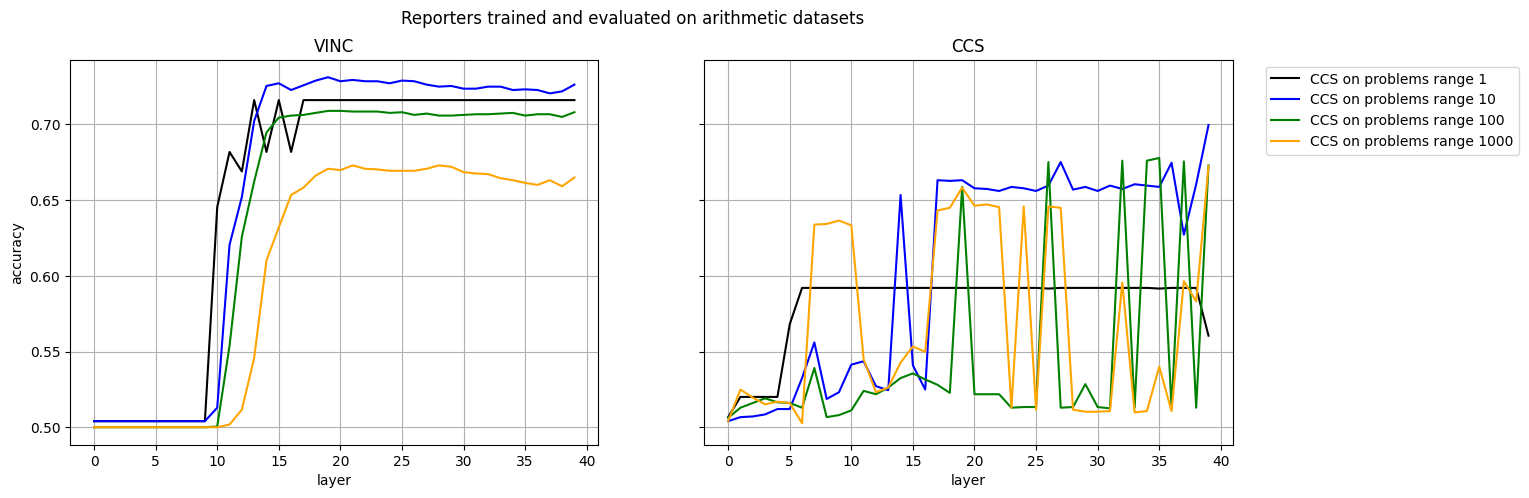

In [57]:
# sadly CCS does not perform as well and we won't be considering it further

fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

# Set big title for the whole figure
fig.suptitle("Reporters trained and evaluated on arithmetic datasets")

ax = axs[0]
ax.set_title(fr"VINC")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

ax = axs[1]
ax.set_title(fr"CCS")
ax.set_xlabel("layer")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'ccs')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'CCS on problems range {d}', color=line_color)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        


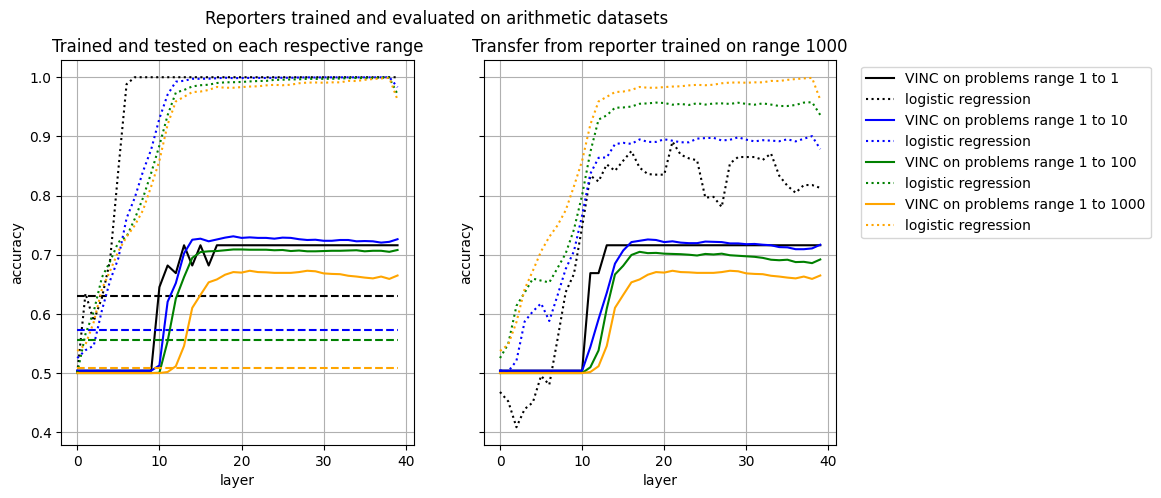

In [72]:
# trained and tested vs transfer

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey = True)

# Set big title for the whole figure
fig.suptitle("Reporters trained and evaluated on arithmetic datasets")

ax = axs[0]
ax.set_title(fr"Trained and tested on each respective range")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
            
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax = axs[1]
ax.set_title(fr"Transfer from reporter trained on range 1000")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    dataset = f"arith{d}"

    experiment = data[(origin_dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range 1 to {d}', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

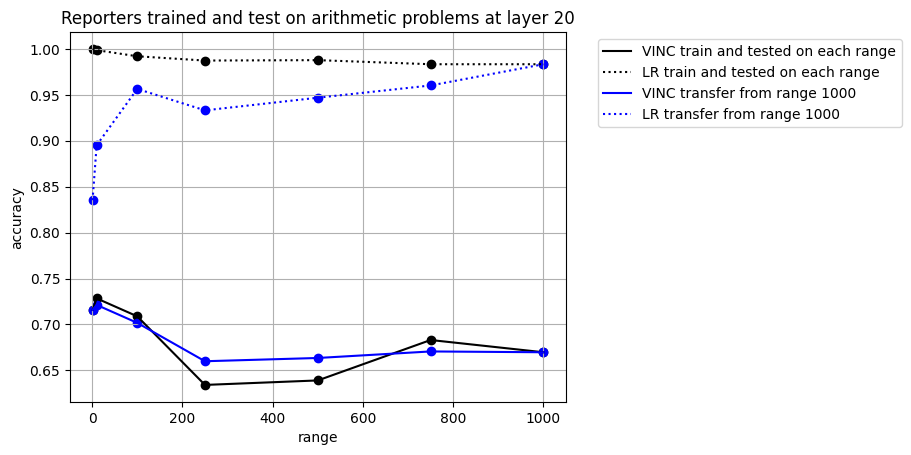

In [63]:
# transfer at layer 20

fig, ax = plt.subplots()
ax.set_title(fr"Reporters trained and test on arithmetic problems at layer 20")
ax.set_xlabel("range")
ax.set_ylabel("accuracy")
ax.grid(True)

layer = 20
acc_vinc = []
acc_vinc_transfer = []
acc_lr = []
acc_lr_transfer = []

d_arr = [1,10,100,250,500,750,1000]

for d in d_arr:

    dataset = f"arith{d}"

    #origin
    experiment = data[(dataset, dataset, 'vinc')]
    acc_vinc.append(experiment.loc[layer, 'acc'])
    acc_lr.append(experiment.loc[layer, 'lr_acc'])

    #transfer
    experiment = data[(origin_dataset, dataset, 'vinc')]
    acc_vinc_transfer.append(experiment.loc[layer, 'acc'])
    acc_lr_transfer.append(experiment.loc[layer, 'lr_acc'])


ax.plot(d_arr, acc_vinc, label=f'VINC train and tested on each range', color = 'k')
ax.scatter(d_arr, acc_vinc, color = 'k')
ax.plot(d_arr, acc_lr, label=f'LR train and tested on each range', color = 'k', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr, color = 'k')
ax.plot(d_arr, acc_vinc_transfer, label=f'VINC transfer from range 1000', color = 'b')
ax.scatter(d_arr, acc_vinc_transfer, color = 'b')
ax.plot(d_arr, acc_lr_transfer, label=f'LR transfer from range 1000', color = 'b', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr_transfer, color = 'b')
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

lr1000 not being better than local makes sense since LR can overfit dataset

## Ungrouped

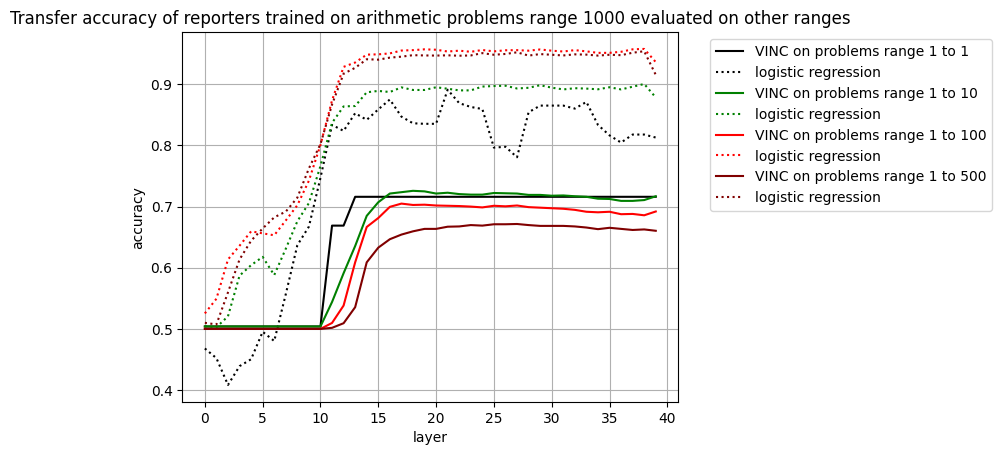

In [33]:
fig, ax = plt.subplots()
ax.set_title(fr"Transfer accuracy of reporters trained on arithmetic problems range 1000 evaluated on other ranges")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate(d_array):

    if d not in d_array_less:
        continue

    dataset = f"arith{d}"

    experiment = data[(origin_dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range 1 to {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()